# Pymaceuticals Inc.
---

### Analysis

- When looking over the data, Capomulin and Ramicane show the most promise of the drug regimens. The data also shows a positive correlation of weight gain and tumor volume according to the data provided by the Capomulin treatment regimen. 
 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

unique_names_data = merged_data.drop_duplicates(subset=["Mouse ID"])
display(unique_names_data.head())


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [2]:
num_mice = merged_data["Mouse ID"].nunique()
print(f"Number of unique mice: {num_mice}")

Number of unique mice: 249


In [3]:
import pandas as pd

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()
all_data_duplicate_mouse = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse_id)]

print("\033[1mAll Data for Duplicate Mouse ID:\033[0m")
display(all_data_duplicate_mouse)


All Data for Duplicate Mouse ID:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="inner")

duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")

clean_data = clean_data[~clean_data["Mouse ID"].isin(duplicate_mice["Mouse ID"])]

columns_to_display_clean_data = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]

summary_data = clean_data.groupby("Mouse ID").head(1)[columns_to_display_clean_data]

display(summary_data)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.0,0,Ramicane,Male,21,16
10,s185,0,45.0,0,Capomulin,Female,3,17
20,x401,0,45.0,0,Capomulin,Female,16,15
30,m601,0,45.0,0,Capomulin,Male,22,17
40,g791,0,45.0,0,Ramicane,Male,11,16
...,...,...,...,...,...,...,...,...
1858,z314,0,45.0,0,Stelasyn,Female,21,28
1860,z435,0,45.0,0,Propriva,Female,12,26
1863,z581,0,45.0,0,Infubinol,Female,24,25
1873,z795,0,45.0,0,Naftisol,Female,13,29


In [5]:
num_clean_mice = clean_data["Mouse ID"].nunique()
print(f"Number of unique mice in clean DataFrame: {num_clean_mice}")


Number of unique mice in clean DataFrame: 248


## Summary Statistics

In [6]:
summary_statistics = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

display(summary_statistics)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
summary_statistics = merged_data.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Standard_Deviation=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem')
)

print("\n\033[1mTumor Volume (mm3) Summary Statistics:\033[0m")

display(summary_statistics)



Tumor Volume (mm3) Summary Statistics:


,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

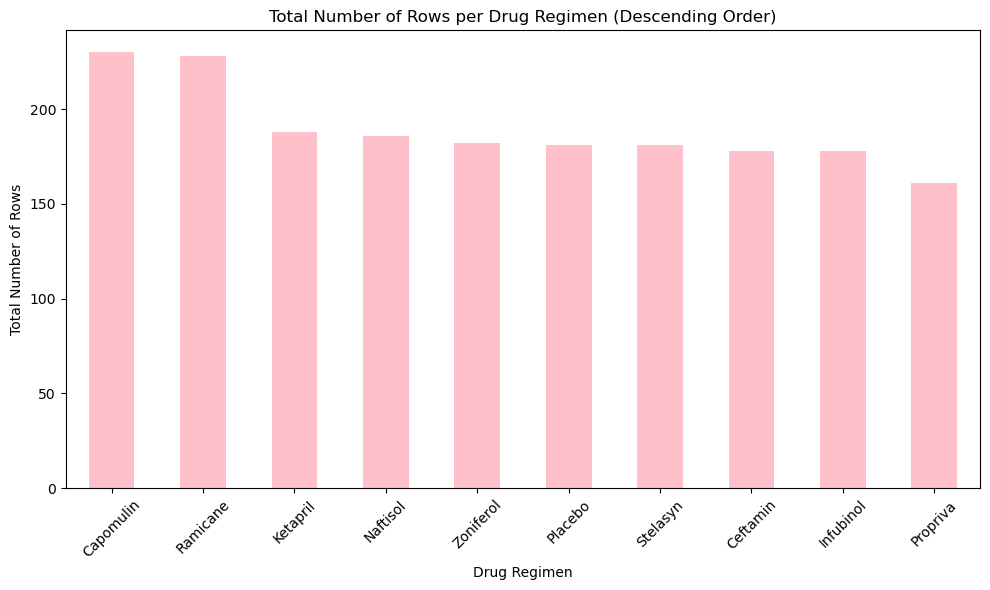

In [8]:
count_per_regimen = merged_data.groupby('Drug Regimen').size()

count_per_regimen_sorted = count_per_regimen.sort_values(ascending=False)

count_per_regimen_sorted.plot(kind='bar', figsize=(10, 6), color='pink')
plt.title("Total Number of Rows per Drug Regimen (Descending Order)")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


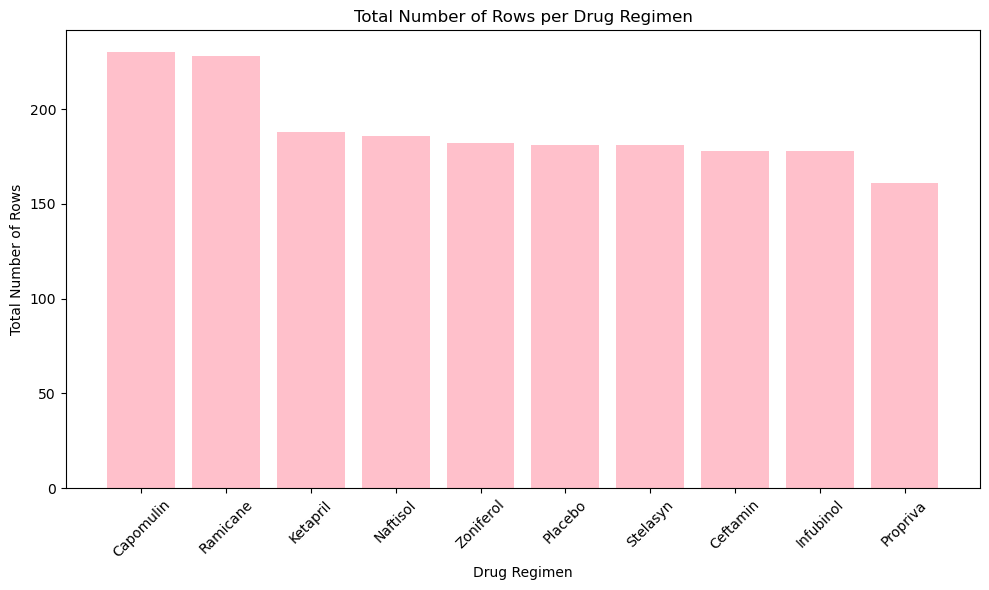

In [9]:
import matplotlib.pyplot as plt

count_per_regimen = merged_data.groupby('Drug Regimen').size()

count_per_regimen_sorted = count_per_regimen.sort_values(ascending=False)

regimens = count_per_regimen_sorted.index
counts = count_per_regimen_sorted.values

plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='pink')
plt.title("Total Number of Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Rows")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


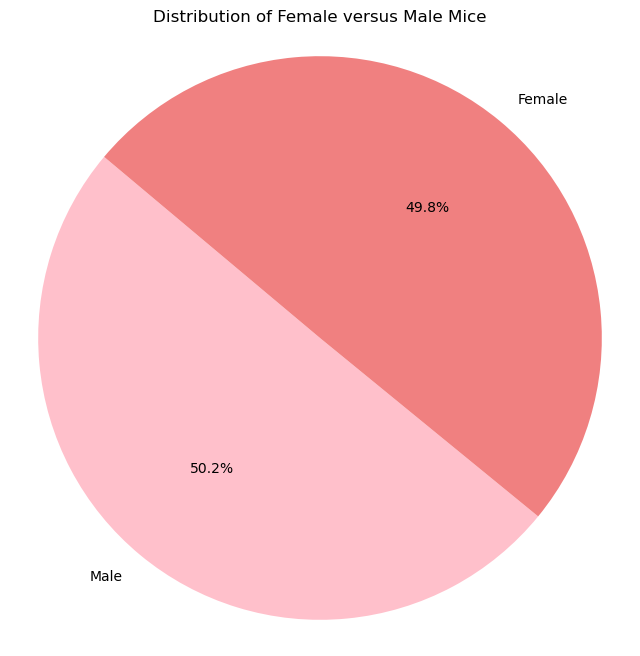

In [10]:
mice_distribution = mouse_metadata['Sex'].value_counts()

mice_distribution.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['pink', 'lightcoral'], startangle=140)
plt.title("Distribution of Female versus Male Mice")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.ylabel('')  # Hide the y-label
plt.show()


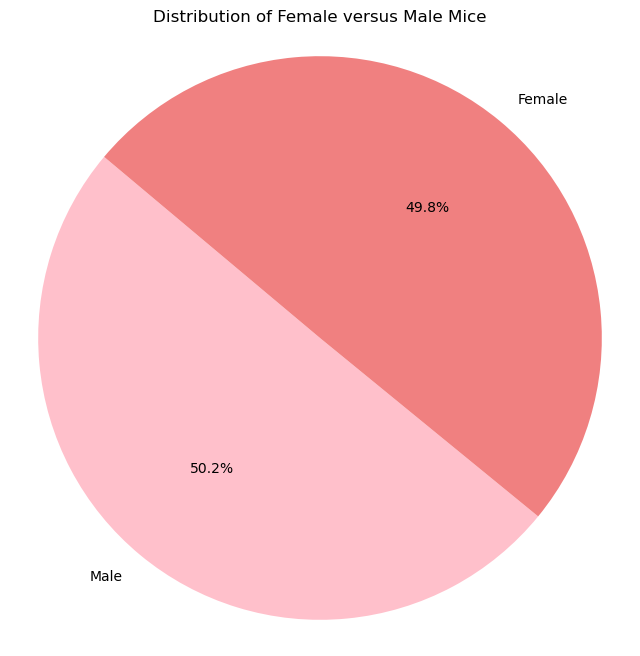

In [11]:
import matplotlib.pyplot as plt

mice_distribution = mouse_metadata['Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(mice_distribution, labels=mice_distribution.index, autopct='%1.1f%%', colors=['pink', 'lightcoral'], startangle=140)
plt.title("Distribution of Female versus Male Mice")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
last_timepoints = merged_data.groupby('Mouse ID')['Timepoint'].max()

final_tumor_volume = pd.merge(last_timepoints, merged_data, on=['Mouse ID', 'Timepoint'], how='inner')

specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(specified_regimens)]

display(final_tumor_volume)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [13]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volume_data = []

for treatment in treatments:
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    tumor_volume_data.append(tumor_volumes)

    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)

    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    print(f"\nResults for {treatment}:")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}")



Results for Capomulin:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Ramicane:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Results for Infubinol:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Results for Ceftamin:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


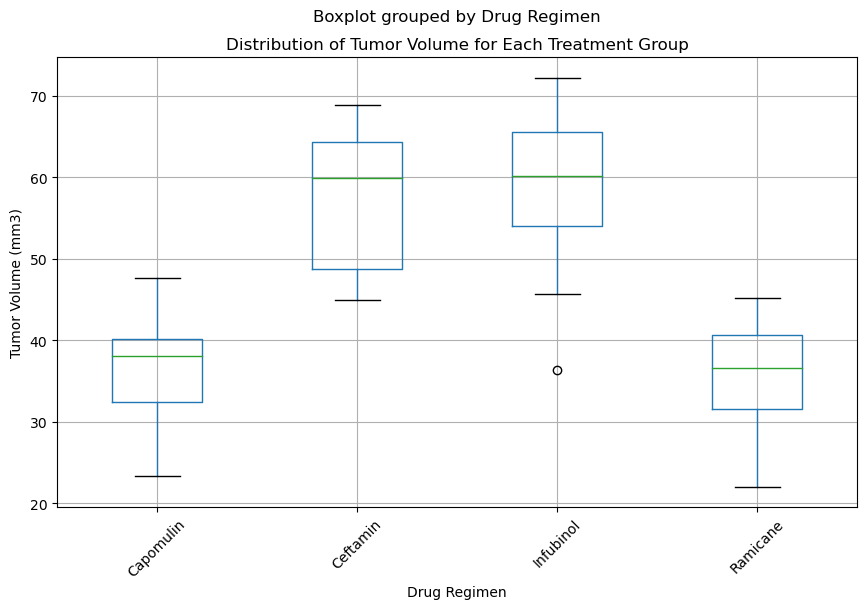

In [14]:
final_tumor_volume.boxplot(by='Drug Regimen', column='Tumor Volume (mm3)', figsize=(10, 6))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(rotation=45)
plt.show()


## Line and Scatter Plots

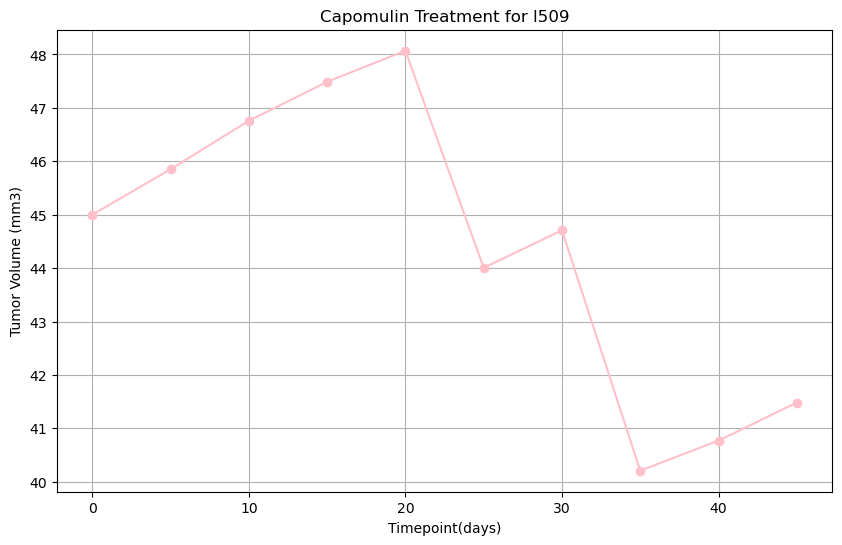

In [15]:
single_mouse_data = merged_data[(merged_data['Drug Regimen'] == 'Capomulin') & (merged_data['Mouse ID'] == 'l509')]

plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='pink', linestyle='-')
plt.title('Capomulin Treatment for l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


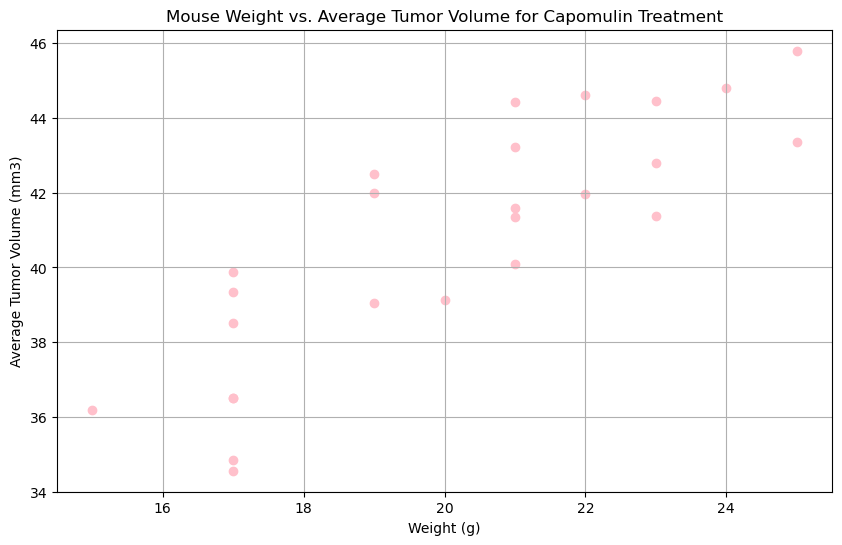

In [16]:
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='pink')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

Correlation Coefficient: 0.8419363424694722


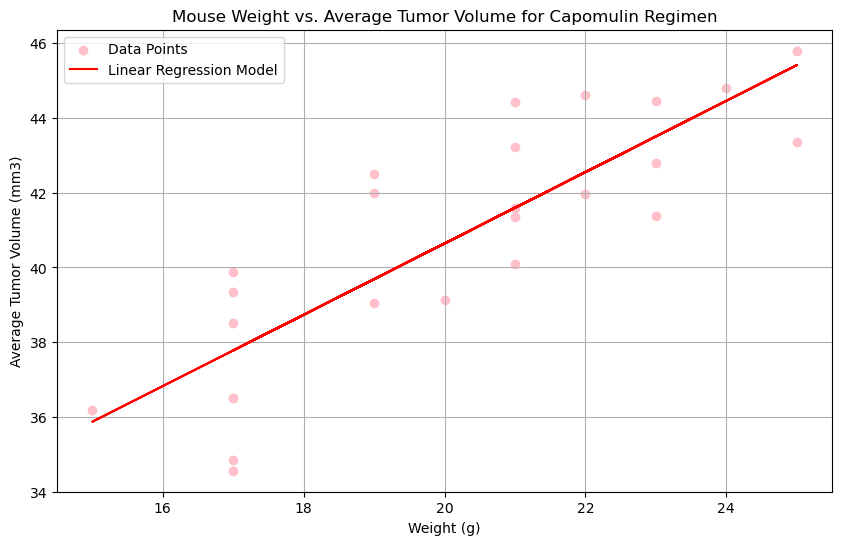

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

correlation_coefficient = mouse_weights.corr(average_tumor_volume)
print("\033[1mCorrelation Coefficient:", correlation_coefficient)

slope, intercept, r_value, p_value, std_err = linregress(mouse_weights, average_tumor_volume)

regression_line = slope * mouse_weights + intercept

plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, marker='o', color='pink', label='Data Points')
plt.plot(mouse_weights, regression_line, color='red', label='Linear Regression Model')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()
plt.show()
